In [1]:
import requests
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
# General libraries
import numpy as np
import pandas as pd
import os
import joblib

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


#machine learning Algorithms For Classification

from lightgbm import LGBMClassifier


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)


100%|██████████| 66.0M/66.0M [00:00<00:00, 70.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [6]:
data= pd.read_csv(os.path.join(path, 'creditcard.csv'))
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data .info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
data.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


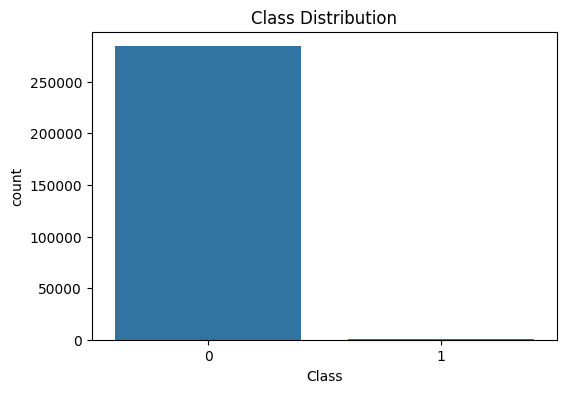

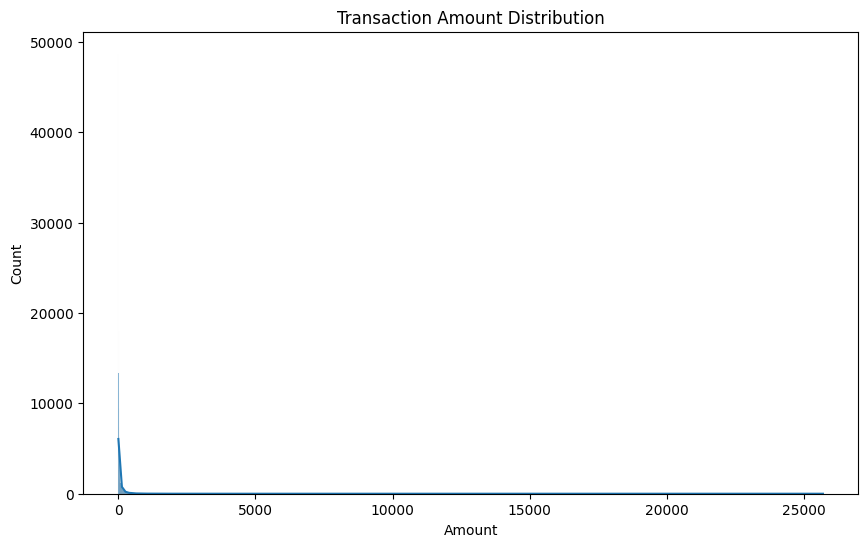

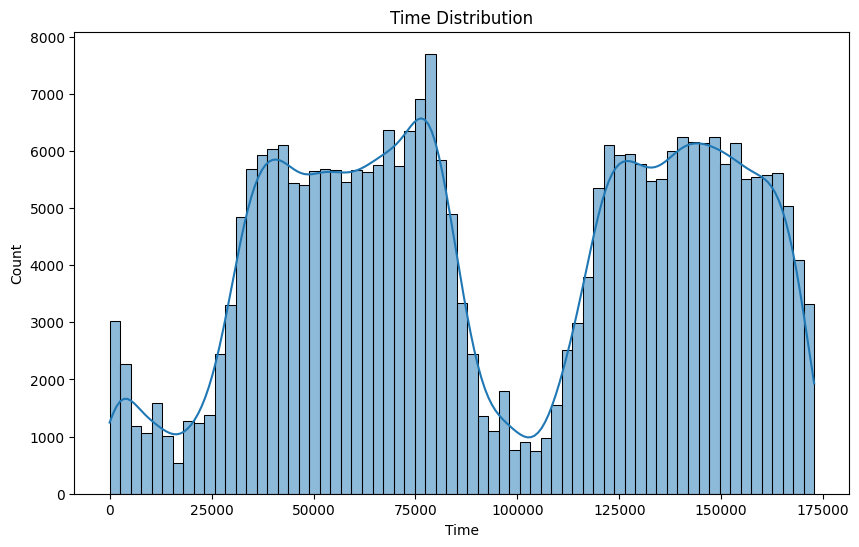

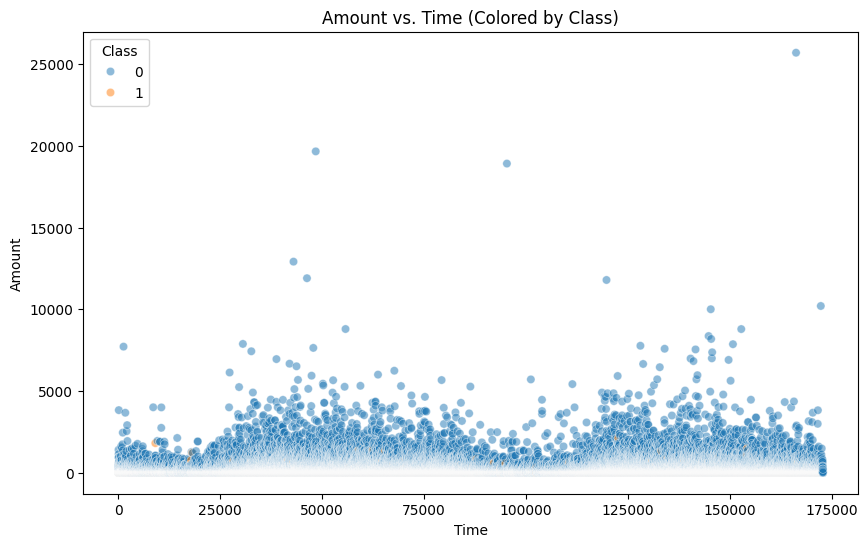

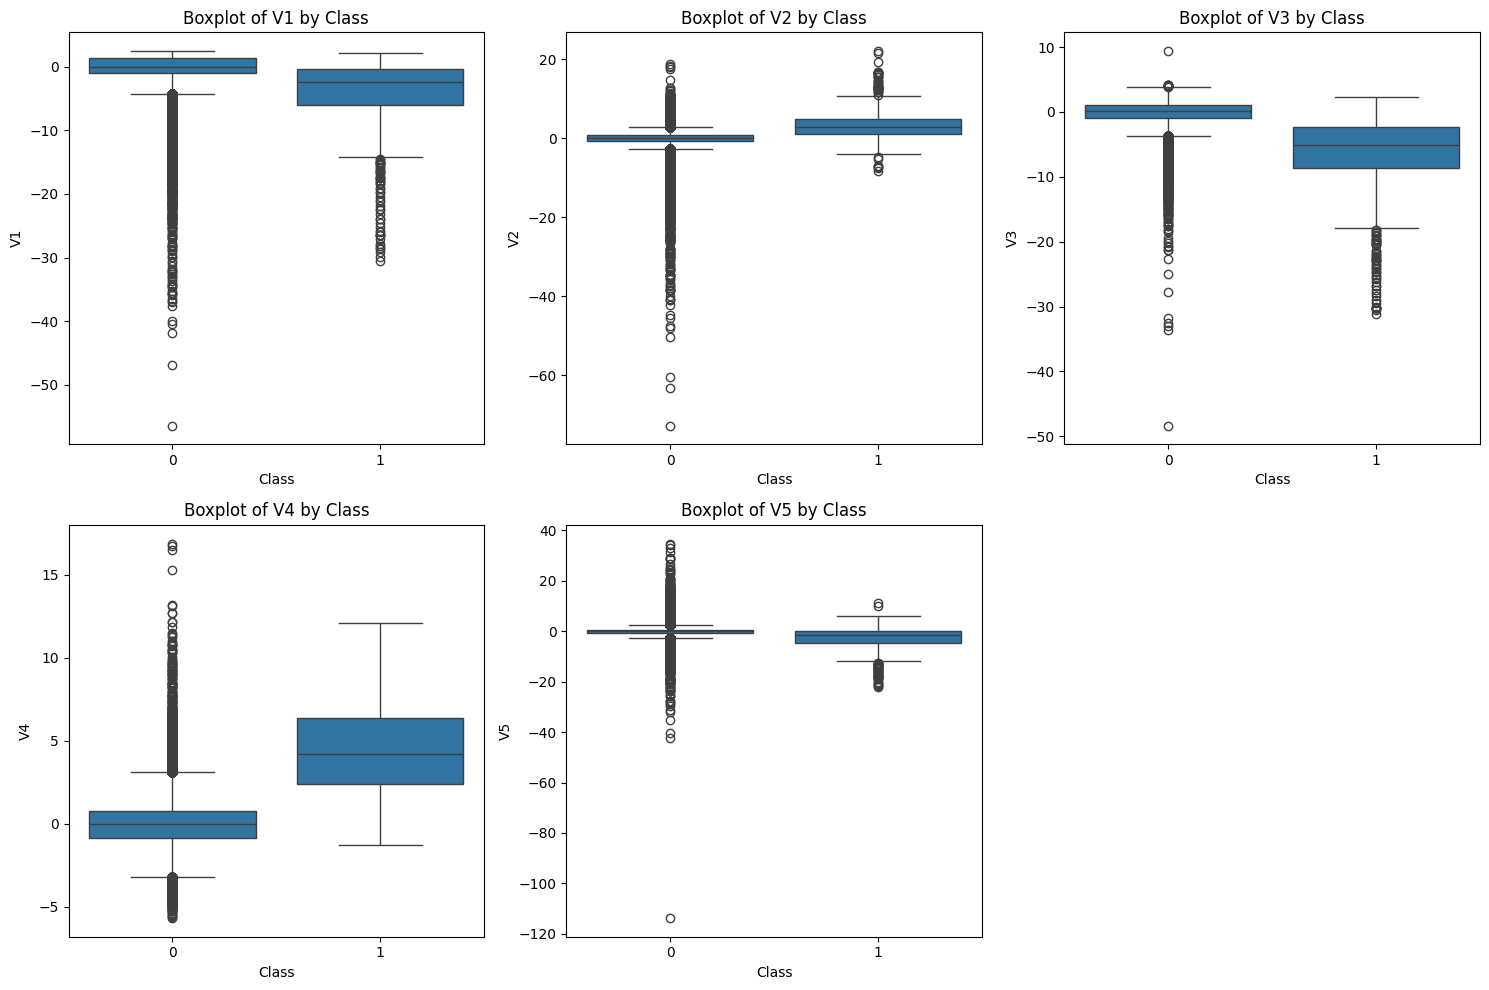

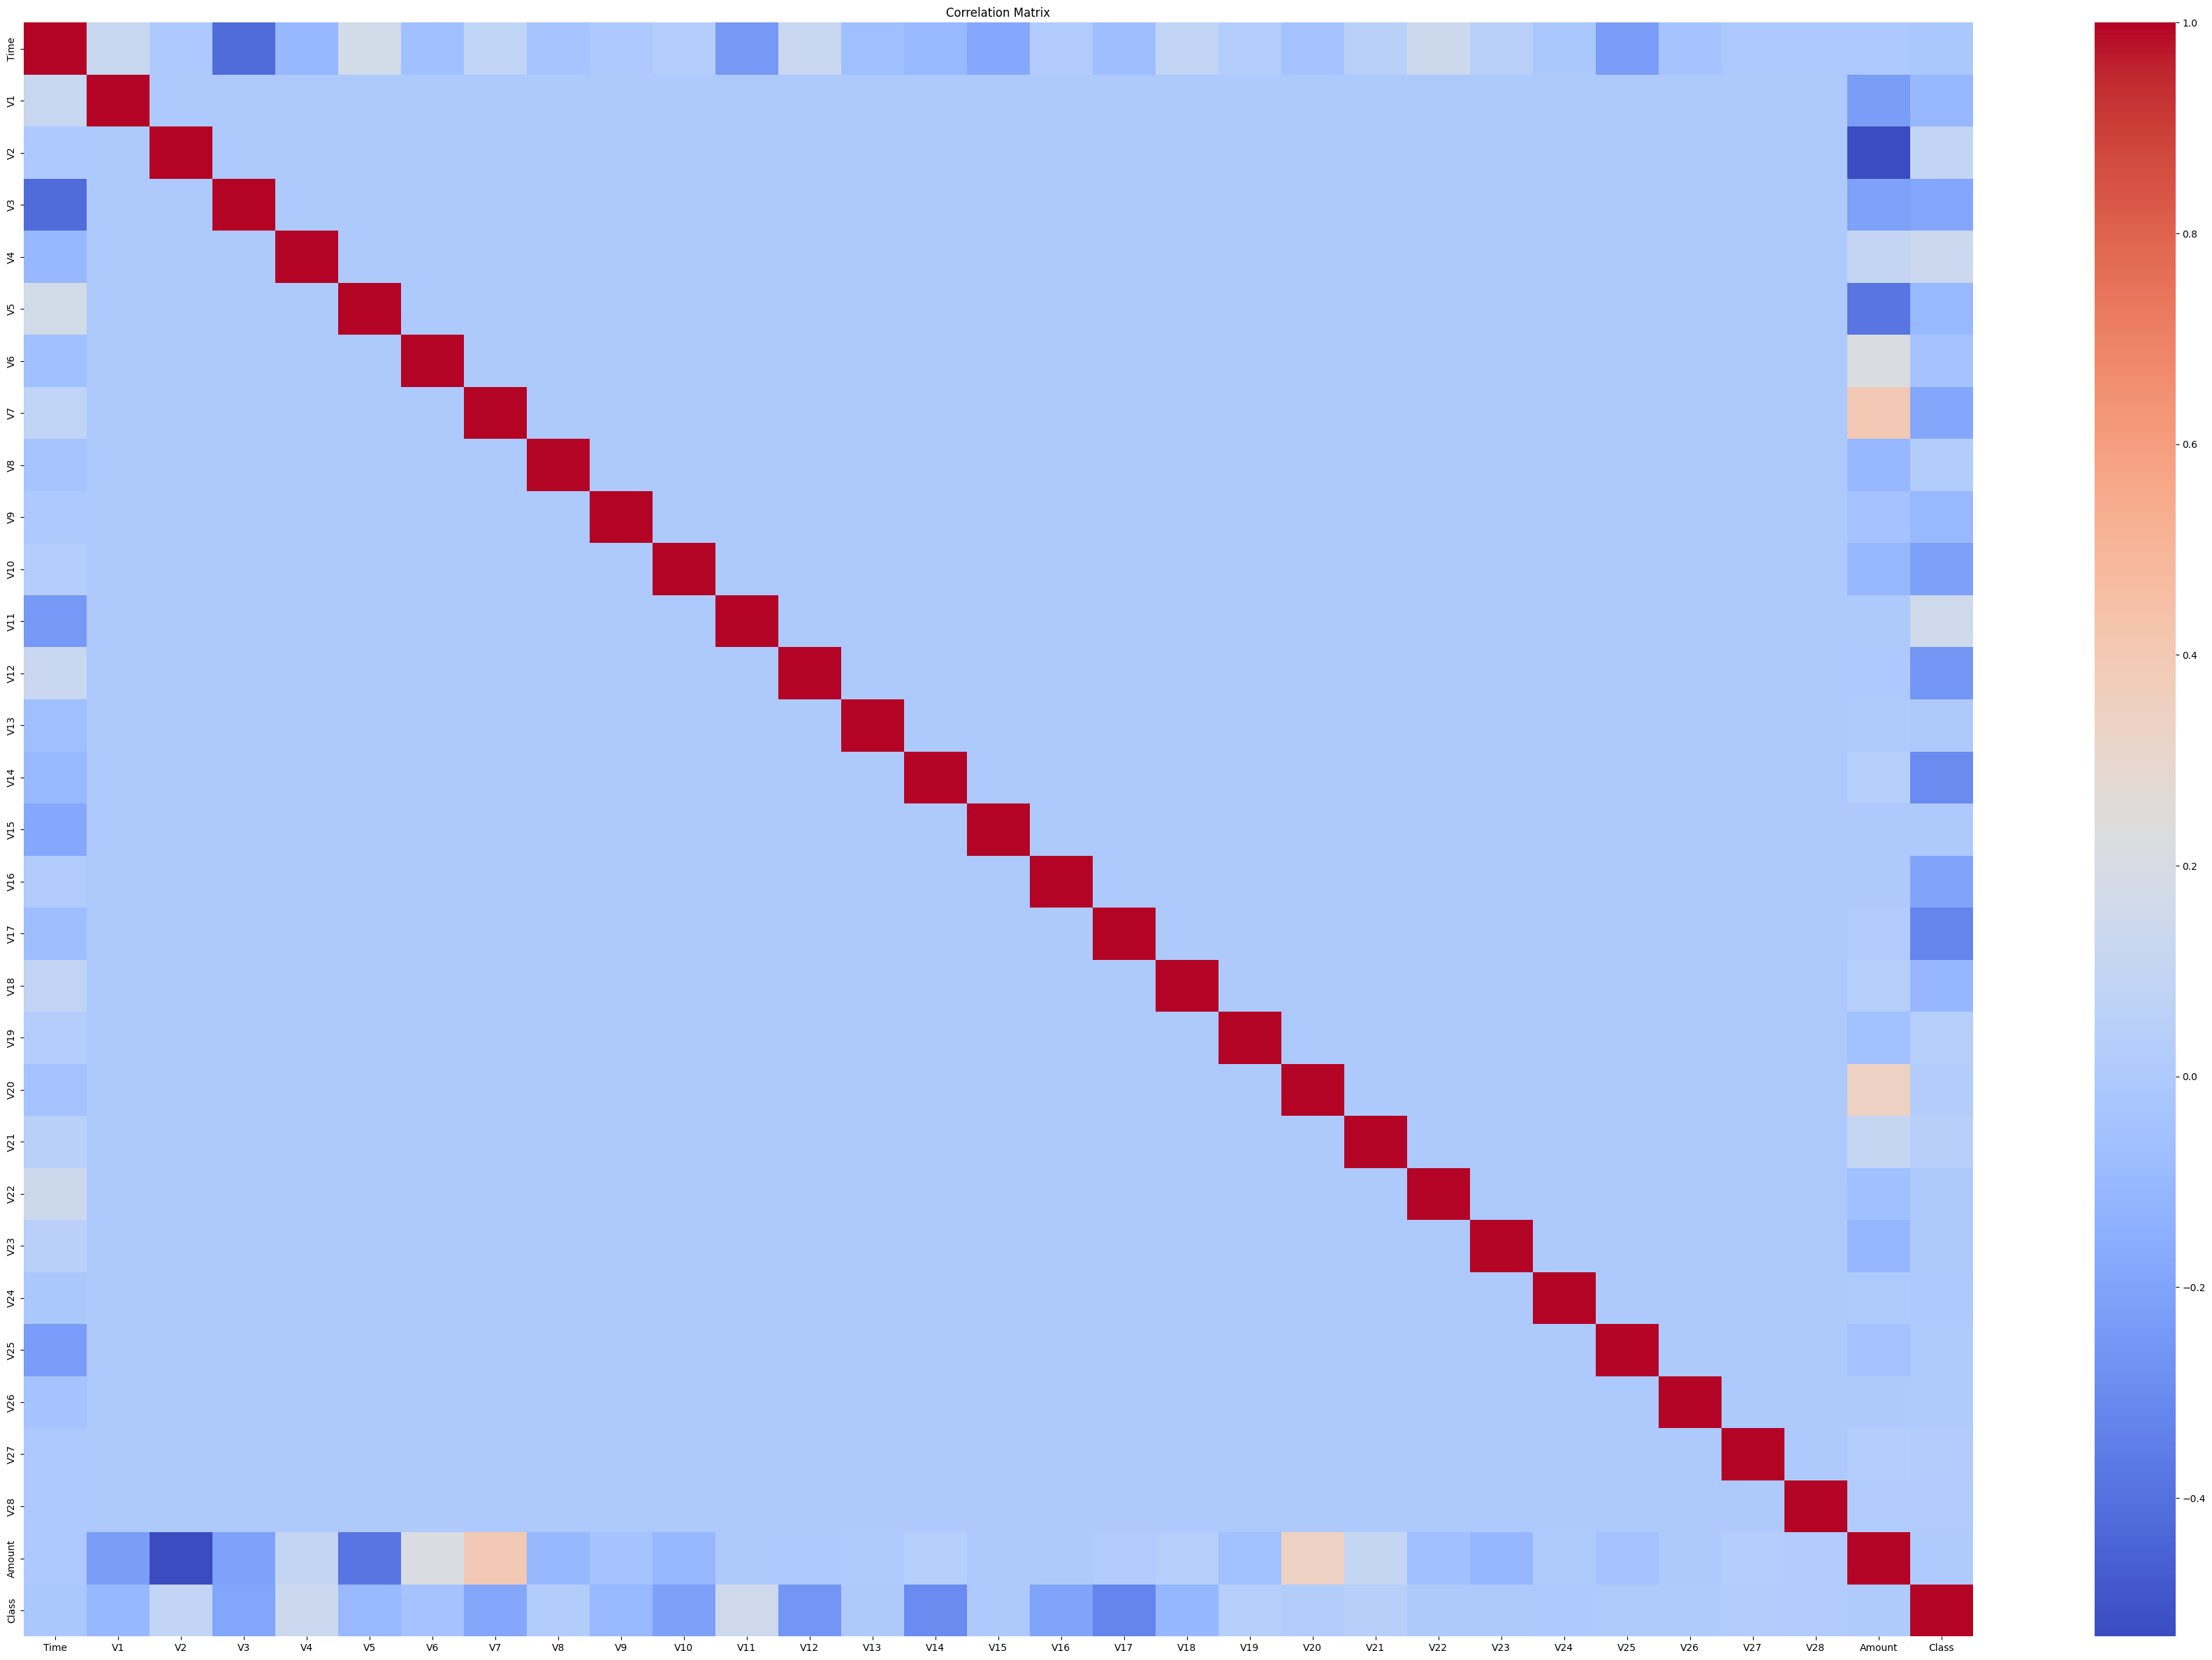

In [13]:

# Visualizations

# 1. Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

# 2. Transaction Amount Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

# 3. Time Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Time'], kde=True)
plt.title('Time Distribution')
plt.show()


# 4. Amount vs Time (colored by class)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=data, alpha=0.5)  # Adjust alpha for better visibility
plt.title('Amount vs. Time (Colored by Class)')
plt.show()

# 5. Boxplots of features for different classes (example with a few features)
features_to_plot = ['V1', 'V2', 'V3', 'V4', 'V5'] # Adjust as needed
plt.figure(figsize=(15, 10))
for i, col in enumerate(features_to_plot):
  plt.subplot(2, 3, i+1)  # Adjust subplot layout as needed
  sns.boxplot(x='Class', y=col, data=data)
  plt.title(f'Boxplot of {col} by Class')
plt.tight_layout() # Prevents overlap of titles
plt.show()


# 6. Correlation Heatmap (optional - may be computationally expensive)
plt.figure(figsize=(45, 30))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [14]:
X = data.drop('Class', axis=1)
y = data['Class']

In [15]:
# Scale 'Amount' and 'Time' using StandardScaler
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X['Amount'].values.reshape(-1, 1))
X['Time'] = scaler.fit_transform(X['Time'].values.reshape(-1, 1))
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047865 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.29      0.69      0.40        98

    accuracy                           1.00     56962
   macro avg       0.64      0.85      0.70     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9964888873283944
Precision: 0.2857142857142857
Recall: 0.6938775510204082
F1 Score: 0.40476190476190477

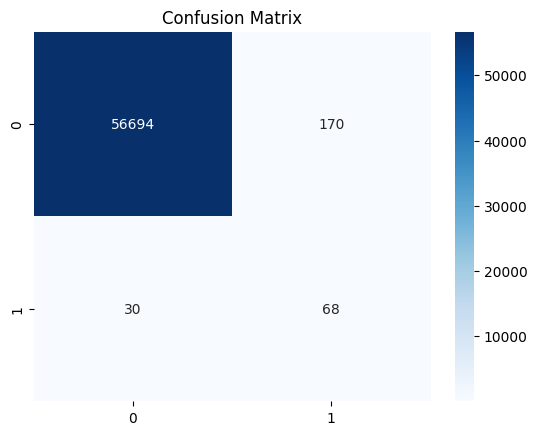

['lgbm_model.pkl']

In [17]:


# Initialize and train the LightGBM classifier
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgbm.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Save the trained model
joblib.dump(lgbm, 'lgbm_model.pkl')

In [20]:


# Load the trained model and scaler
lgbm_model = joblib.load('lgbm_model.pkl')
scaler = joblib.load('scaler.pkl')

# Example of new data (replace with your actual data)
new_data = pd.DataFrame({
    'Time': [172792],  # Example Time value
    'V1': [-1.3598071336738],
    'V2': [-0.0727811733098497],
    'V3': [2.53634673796914],
    'V4': [1.37815522427443],
    'V5': [-0.338320776994299],
    'V6': [0.462387777762292],
    'V7': [0.239598554061257],
    'V8': [0.0986979012610507],
    'V9': [0.363786969611213],
    'V10': [0.090794171978931],
    'V11': [0.551600473298578],
    'V12': [-0.617800855762348],
    'V13': [-0.991389847235408],
    'V14': [-0.311169353699879],
    'V15': [1.46817697209427],
    'V16': [-0.470400525259478],
    'V17': [0.207971241929242],
    'V18': [0.025790580198559],
    'V19': [0.403992960255733],
    'V20': [0.251412098239705],
    'V21': [-0.018306777944153],
    'V22': [0.277837575558899],
    'V23': [-0.110473910188767],
    'V24': [0.0669280749146741],
    'V25': [0.128539358273528],
    'V26': [-0.189114843888824],
    'V27': [0.133558376740387],
    'V28': [-0.0210530534538215],
    'Amount': [149.62]
})


# Scale the new data using the same scaler used for training
new_data['Amount'] = scaler.transform(new_data['Amount'].values.reshape(-1, 1))
new_data['Time'] = scaler.transform(new_data['Time'].values.reshape(-1, 1))

# Make predictions on the new data
new_predictions = lgbm_model.predict(new_data)

print(f"Predictions for new data: {new_predictions}")

Predictions for new data: [0]
